### Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Taking data as Input

In [2]:
data = pd.read_csv('titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data Visualisation

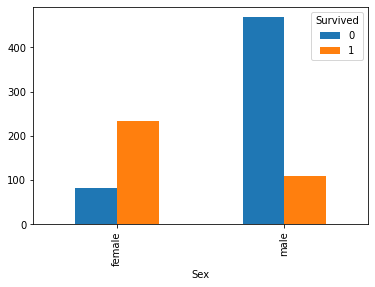

In [3]:
pd.crosstab(data.Sex, data.Survived).plot(kind = 'bar')

Here we can see that more males have lost their lives and more females have survived


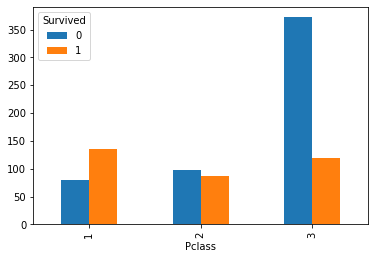

In [4]:
pd.crosstab(data.Pclass, data.Survived).plot(kind = 'bar')

People having Pclass as 3 are more likely not to survive

### Choosing attributes which are important for Classification

In [5]:
X = data[['Pclass', 'Sex', 'Age', 'Fare']] # X is our independent variable
y = data.Survived  # y is our target variable

In [6]:
X.head()

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500


### Data Preprocessing

In [7]:
X.Age = X.Age.fillna(X.Age.mean()) # Replacing NaN values with mean values
X.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500


In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
le = LabelEncoder()
X['Sex_modified'] = le.fit_transform(X['Sex'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Used labelEncoder to convert categorical data(Sex) with numerical data

In [10]:
X.head()
X.drop('Sex', axis = 'columns', inplace=True)
X.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Pclass,Age,Fare,Sex_modified
0,3,22.0,7.2500,1
1,1,38.0,71.2833,0
2,3,26.0,7.9250,0
3,1,35.0,53.1000,0
4,3,35.0,8.0500,1


y.head()

In [11]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [20]:
X_train.shape

(712, 4)

In [21]:
X_test.shape

(179, 4)

### Importing Decision Tree Classifier


In [22]:
from sklearn import tree

In [23]:
clf = tree.DecisionTreeClassifier()

In [24]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

Our model has been trained. Kudos!

### Accuracy

In [25]:
accuracy = clf.score(X_test, y_test)
print('Accuracy of our model is {} %'.format(accuracy * 100))

Accuracy of our model is 79.3296089385475 %
